# Linear SVM — (Hinge‑loss + Gradient Descent)

Implements a *soft‑margin* linear SVM in NumPy by optimising the hinge‑loss
with \(L2\) regularisation.

*(Generated 2025-06-05)*


## 1. Synthetic separable-ish dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(2)

# Total number of data points
N = 200

# -----------------------------
# 🔵 Generate positive class (+1)
# -----------------------------
# 100 samples drawn from standard normal, shifted to centre at (2, 2)
X_pos = np.random.randn(N // 2, 2) + np.array([2, 2])

# -----------------------------
# 🔴 Generate negative class (−1)
# -----------------------------
# 100 samples drawn from standard normal, shifted to centre at (−2, −2)
X_neg = np.random.randn(N // 2, 2) + np.array([-2, -2])

# -----------------------------
# 📦 Combine both classes
# -----------------------------
# Stack feature vectors vertically → shape (200, 2)
X = np.vstack([X_pos, X_neg])

# Stack corresponding labels → shape (200, 1)
# Class +1 for positive samples, -1 for negative
y = np.vstack([np.ones((N // 2, 1)), -np.ones((N // 2, 1))])



In [2]:
## 2. Helper functions

In [ ]:
def hinge_loss(w, b, C=1.0):
    """
    Compute the hinge loss for linear SVM.

    Args:
        w (np.ndarray): Weight vector, shape (D, 1)
        b (float): Bias term (scalar)
        C (float): Regularisation strength (penalises margin violations)

    Returns:
        float: Total hinge loss (objective function)
    """
    # 1. Compute the margins for all points
    # margin = 1 - yᵢ(wxᵢ + b)
    margins = 1 - y * (X @ w + b)  # shape: (N, 1)

    # 2. Apply hinge loss (max(0, margin))
    # Hinge loss penalises only points inside or beyond the margin
    hinge = np.maximum(0, margins)

    # 3. Total loss = regularisation + mean hinge penalty
    # 0.5 * ||w||² is L2 regularisation (encourages smaller weights)
    return 0.5 * np.sum(w**2) + C * np.mean(hinge)


def gradients(w, b, C=1.0):
    """
    Compute gradients of hinge loss w.r.t. w and b.

    Args:
        w (np.ndarray): Weight vector, shape (D, 1)
        b (float): Bias term
        C (float): Regularisation parameter

    Returns:
        tuple: (gradient_w, gradient_b)
    """
    # 1. Compute margins for each sample
    margins = 1 - y * (X @ w + b)  # shape: (N, 1)

    # 2. Indicator: 1 if margin > 0 (misclassified or on-margin), else 0
    indicator = (margins > 0).astype(float)  # shape: (N, 1)

    # 3. Gradient of loss w.r.t. w:
    # First term: derivative of 0.5 * ||w||² = w
    # Second term: derivative of hinge loss
    # Resulting shape: (D, 1)
    d_w = w - C * np.mean((indicator * y) * X, axis=0, keepdims=True).T

    # 4. Gradient of loss w.r.t. b:
    # Only comes from hinge part (no regularisation on bias)
    d_b = - C * np.mean(indicator * y)  # scalar

    return d_w, d_b



## 3. Training loop

In [12]:
# ----------------------------
# 🏁 Initialisation
# ----------------------------

# Initialise weights as zero vector (2D because input features are 2D)
w = np.zeros((2, 1))

# Initialise bias as scalar 0
b = 0.0

# Set learning rate (step size for updates)
lr = 0.1
# ----------------------------
# 🔁 Training loop (1000 epochs)
# ----------------------------
for epoch in range(1000):
    # Compute gradients of the hinge loss w.r.t. w and b
    dw, db = gradients(w, b, C=1.0)

    # Update parameters using gradient descent
    w -= lr * dw  # move in direction of negative gradient
    b -= lr * db

    # Every 200 iterations, print current loss
    if epoch % 200 == 0:
        print(f"epoch {epoch} | loss {hinge_loss(w, b):.3f}")
        # ----------------------------
# ✅ Final output
# ----------------------------
print("Final w:", w.ravel(), " b:", b)



epoch 0 | loss 0.283
epoch 200 | loss 0.179
epoch 400 | loss 0.179
epoch 600 | loss 0.179
epoch 800 | loss 0.179
Final w: [0.32175031 0.30189467]  b: -0.011000000000000006


## 4. Plot decision boundary

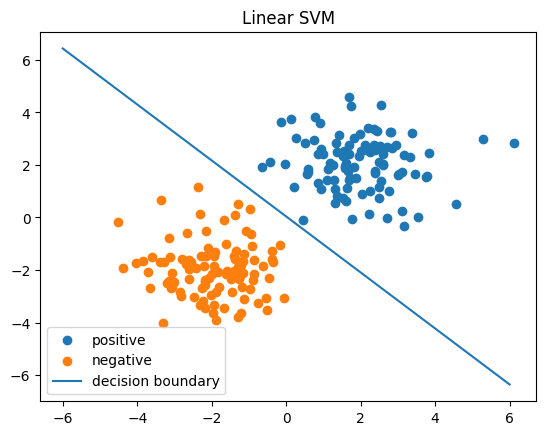

In [13]:
# Create a new plot
plt.figure()

# Plot positive class points
plt.scatter(X_pos[:, 0], X_pos[:, 1], label="positive")

# Plot negative class points
plt.scatter(X_neg[:, 0], X_neg[:, 1], label="negative")

# Create x values for drawing the decision line
x_vals = np.linspace(-6, 6, 100)

# Calculate y values for the line: w·x + b = 0 → y = -(w0 * x + b) / w1
y_vals = -(w[0] * x_vals + b) / w[1]

# Draw the decision boundary line
plt.plot(x_vals, y_vals, label="decision boundary")

# Add legend and title, then show the plot
plt.legend()
plt.title("Linear SVM")
plt.show()
